# تنظیمات اولیه

ابتدا کتابخانه های مورد نظر را ایمپورت می کنیم و دیتاست را لود می کنیم.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import entropy

سپس فایل دیتاست را لود می کنیم


In [1321]:
dataset = pd.read_csv('titanic.csv')

در اینجا ساختار کلی دیتاست را بررسی می کنیم


In [1322]:
# dataset.info()

rows, cols = dataset.shape

print(f"Number of attributes : {cols}")
print(f"Number of records : {rows}")

print("**********")
for col in dataset.columns:
    print(f"Name : {col}")
    print(f"Type : {dataset[col].dtype}")
    print("----------")
print("**********")

# dataset.plot(kind="scatter",x="PassengerId" , y="Age")

Number of attributes : 12
Number of records : 1374
**********
Name : PassengerId
Type : int64
----------
Name : Survived
Type : object
----------
Name : Pclass
Type : float64
----------
Name : Name
Type : object
----------
Name : Sex
Type : object
----------
Name : Age
Type : float64
----------
Name : SibSp
Type : float64
----------
Name : Parch
Type : float64
----------
Name : Ticket
Type : object
----------
Name : Fare
Type : object
----------
Name : Cabin
Type : object
----------
Name : Embarked
Type : object
----------
**********


آمار توصیفی هر ستون


In [1323]:
print("**********")

for col in dataset.columns:
    if col in ["Age", "Pclass", "SibSp", "Parch", "Fare"]:
        numeric_col = pd.to_numeric(dataset[col], errors='coerce')
        
        print(f"Name : {col}")
        print(f"    Mean : {numeric_col.mean()}")
        print(f"    STD : {numeric_col.std()}")
        print(f"    Median : {numeric_col.median()}")
        mode_value = numeric_col.mode().values[0] if not numeric_col.mode().empty else 'N/A'
        print(f"    Mode : {mode_value}")
        print("------")
        
print("**********")


**********
Name : Pclass
    Mean : 2.308056872037915
    STD : 1.1561573124397275
    Median : 3.0
    Mode : 3.0
------
Name : Age
    Mean : 99.05856472795496
    STD : 398.88171743930275
    Median : 29.0
    Mode : 24.0
------
Name : SibSp
    Mean : 20.635071090047393
    STD : 120.91339798589294
    Median : 0.0
    Mode : 0.0
------
Name : Parch
    Mean : 14.22168905950096
    STD : 97.81921703702231
    Median : 0.0
    Mode : 0.0
------
Name : Fare
    Mean : 1505895583.1784854
    STD : 21669885302.455467
    Median : 15.3729
    Mode : 13.0
------
**********


# شناسایی داده های از دست رفته


In [1324]:
print("Number of missing values for each column : ")
print(f"{dataset.isnull().sum()}")
print("\n*******************\n")
print("Percent of missing values for each column : ")
print(f"{dataset.isnull().mean() * 100}")


Number of missing values for each column : 
PassengerId       0
Survived        289
Pclass          319
Name              0
Sex             329
Age             308
SibSp           319
Parch           332
Ticket            0
Fare            319
Cabin          1068
Embarked        345
dtype: int64

*******************

Percent of missing values for each column : 
PassengerId     0.000000
Survived       21.033479
Pclass         23.216885
Name            0.000000
Sex            23.944687
Age            22.416303
SibSp          23.216885
Parch          24.163028
Ticket          0.000000
Fare           23.216885
Cabin          77.729258
Embarked       25.109170
dtype: float64


# شناسایی داده های پرت و نویزی

با استفاده از بازه میان چارکی


In [1325]:
print(dataset.describe())

print("*********")
for col in dataset.columns:
    if col in ["Age", "SibSp", "Parch", "Fare"]:
        numeric_col = pd.to_numeric(dataset[col], errors='coerce').dropna()
        q1 = numeric_col.quantile(0.25)
        q3 = numeric_col.quantile(0.75)
        IQR = q3 - q1
        
        low = q1 - 1.5 * IQR
        high = q3 + 1.5 * IQR
        
        outlier = ((numeric_col > high) | (numeric_col < low)).sum()
        print(f"{col} => {outlier}")
        print("**********")



       PassengerId       Pclass          Age        SibSp        Parch
count  1374.000000  1055.000000  1066.000000  1055.000000  1042.000000
mean    657.784571     2.308057    99.058565    20.635071    14.221689
std     378.886774     1.156157   398.881717   120.913398    97.819217
min       1.000000    -1.000000   -10.000000    -5.000000    -5.000000
25%     330.250000     1.000000    21.000000     0.000000     0.000000
50%     660.500000     3.000000    29.000000     0.000000     0.000000
75%     984.750000     3.000000    40.875000     1.000000     1.000000
max    1309.000000     5.000000  3433.000000   999.000000   999.000000
*********
Age => 72
**********
SibSp => 112
**********
Parch => 86
**********
Fare => 134
**********


Pclass


In [1326]:
for col in dataset.columns:
    if col == "Pclass":
        val = dataset[col].count() - dataset[col].isin([1,2,3]).sum()
        print(f"Pclass wrong values => {val}")
        
        invalid_values = dataset[~dataset[col].isin([1, 2, 3])][col].unique()
        print(f"Invalid Pclass values found: {invalid_values}")
        print("**********")
    elif col == "Sex":
        val = dataset[col].count() - dataset[col].isin(["female","male"]).sum()
        print(f"Sex wrong values => {val}")
        
        invalid_values = dataset[~dataset[col].isin(["female","male"])][col].unique()
        print(f"Invalid Pclass values found: {invalid_values}")
        print("**********")
    elif col == "Cabin" :
        # val = dataset[col].count() - dataset[col].isin(["female","male"]).sum()
        
        filtered = dataset[col][ ~dataset[col].str.match(r'^[A-Z]\d+' , na=False) ]
        print(f"Cabin wrong values => {filtered.count()}")
        # filtered_list = dataset["Cabin"].dropna().astype(str).str.extract(r'([A-Z]\d+)', expand=False).dropna()
        # print(filtered_list.tolist())
        # invalid_values = dataset[col].unique()
        print(f"Invalid Cabin values found: {filtered.unique()}")
        print("**********")
    elif col == "Embarked":
        # filtered = ~dataset[col].isin(["S","Q","C"])
        
        valid_values = ["S", "Q", "C"]
        invalid_mask = ~dataset[col].isin(valid_values)
        wrong_count = invalid_mask.sum()
        invalid_values = dataset[col][invalid_mask].unique()
        
        print(f"Emarked wrog values => {wrong_count}")
        print(f"Invalid Emarked values found: {invalid_values}")
        print("**********")
    elif col == "Ticket":
        filtered =dataset[col][~dataset[col].astype(str).str.match(r'\d+',na=False)]
        
        print(f"Ticket wrog values => {filtered.count()}")
        print(f"Invalid Ticket values found: {filtered.tolist()}")
        print("**********")


Pclass wrong values => 119
Invalid Pclass values found: [nan  5.  4.  0. -1.]
**********
Sex wrong values => 63
Invalid Pclass values found: [nan 'unknown' 'alien' 'mele']
**********
Ticket wrog values => 367
Invalid Ticket values found: ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 'PP 9549', 'A/5. 2151', 'PC 17601', 'PC 17569', 'C.A. 24579', 'PC 17604', 'A./5. 2152', 'SC/Paris 2123', 'S.C./A.4. 23567', 'A/4. 39886', 'PC 17572', 'C.A. 31026', 'C.A. 34651', 'CA 2144', 'PC 17605', 'C.A. 29395', 'S.P. 3464', 'C.A. 33111', 'CA 2144', 'S.O.C. 14879', 'SO/C 14885', 'W./C. 6608', 'SOTON/OQ 392086', 'W.E.P. 5734', 'C.A. 2315', 'PC 17754', 'PC 17759', 'STON/O 2. 3101294', 'PC 17558', 'S.O.C. 14879', 'A4. 54510', 'C 17369', 'SOTON/O.Q. 3101307', 'A/5. 3337', 'C.A. 29178', 'SC/PARIS 2133', 'PC 17593', 'STON/O2. 3101279', 'C.A. 33112', 'W./C. 6608', 'S.O.P. 1166', 'A.5. 11206', 'A/5. 851', 'Fa 265302', 'PC 17597', 'SOTON/OQ 392090', 'CA. 2343', 'C.A. 33595', 'PC 17318', 'STON/O 2. 3101280', 'PC 1

داده های نویزی


In [1327]:
for column in dataset.columns:
    if column in ["Sex","Cabin","Embarked"]:
        unique_counts = dataset[column].value_counts(normalize=True)
        rare_values = unique_counts[unique_counts < 0.01].index.tolist()
        print(f"Rare values in {column}: {rare_values}")

Rare values in Sex: ['mele']
Rare values in Cabin: ['D19', 'B51 B53 B55', 'C126', 'A34', 'C101', 'E121', 'B20', 'E101', 'D28', 'B58 B60', 'D26', 'E31', 'D10 D12', 'C83', 'C52', 'C65', 'C54', 'B49', 'C106', 'E67', 'B77', 'D36', 'C2', 'C125', 'C62 C64', 'B5', 'F G63', 'B71', 'B41', 'C86', 'B22', 'D37', 'E25', 'C124', 'B18', 'E50', 'F G73', 'B28', 'D35', 'E33', 'C93', 'D15', 'C123', 'D33', 'C85', 'B78', 'E46', 'C116', 'C55 C57', 'C97', 'C6', 'C80', 'B69', 'C31', 'B45', 'D30', 'B3', 'A36', 'D17', 'E8', 'C46', 'C89', 'C7', 'C92', 'D21', 'C68', 'D20', 'E44', 'C32', 'B35', 'E24', 'A6', 'D56', 'A5', 'B30', 'C110', 'F E69', 'C103', 'B86', 'E36', 'A19', 'C118', 'C87', 'B94', 'C99', 'D7', 'B80', 'A32', 'C49', 'A7', 'B19', 'B4', 'A31', 'D47', 'B73', 'D46', 'B79', 'B37', 'C30', 'A14', 'E63', 'E38', 'E12', 'C104', 'C111', 'E40', 'C91', 'T', 'C128', 'E10', 'C82', 'C90', 'D49', 'D9', 'A23', 'A26', 'B50', 'E58', 'D48', 'A16', 'C70', 'B38', 'B39', 'E68', 'A10', 'A20', 'D50', 'C95', 'B82 B84', 'B102', 'D

بررسی تکراری بودن داده ها


In [1328]:
duplicate_passenger_ids = dataset[dataset.duplicated(subset=["PassengerId"],keep=False)]

print("\nDuplicate PassengerId entries (THIS SHOULD NOT HAPPEN):")
print(duplicate_passenger_ids.sort_values('PassengerId'))



Duplicate PassengerId entries (THIS SHOULD NOT HAPPEN):
      PassengerId Survived  Pclass                                     Name  \
16             17      0.0     3.0                     Rice, Master. Eugene   
1358           17      0.0     NaN                     Rice, Master. Eugene   
1315           23      1.0     3.0         McGowan, Miss. Anna "Annie" 7932   
22             23      1.0     NaN              McGowan, Miss. Anna "Annie"   
24             25      0.0     NaN            Palsson, Miss. Torborg Danira   
...           ...      ...     ...                                      ...   
1252         1253      NaN     2.0  Mallet, Mrs. Albert (Antoinette Magnin)   
1283         1284       No     3.0            Abbott, Master. Eugene Joseph   
1345         1284      0.0     3.0       Abbott, Master. Eugene Joseph 2489   
1292         1293      0.0     2.0                     Gale, Mr. Harry 7207   
1337         1293      NaN     2.0                          Gale, Mr. Harr

نمودار ها


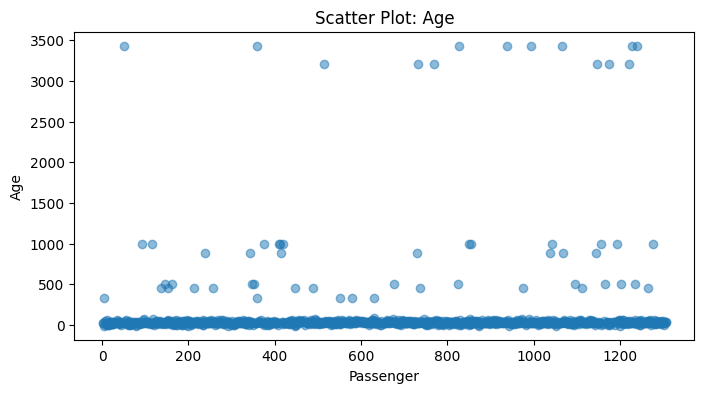

In [1329]:
# plt.figure()
# sns.histplot(data=dataset, x='Age', bins=30, kde=True)

# dataset.plot()
# plt.title('توزیع سن مسافران')
# plt.xlabel('سن')
# plt.ylabel('تعداد')
# plt.figure(figsize=(6, 4))
# plt.scatter(dataset["Age"])
# plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(y=dataset["Age"],x=dataset["PassengerId"] ,alpha=0.5)
plt.xlabel("Passenger")
plt.ylabel("Age")
plt.title("Scatter Plot: Age")
# plt.grid(True)
plt.show()

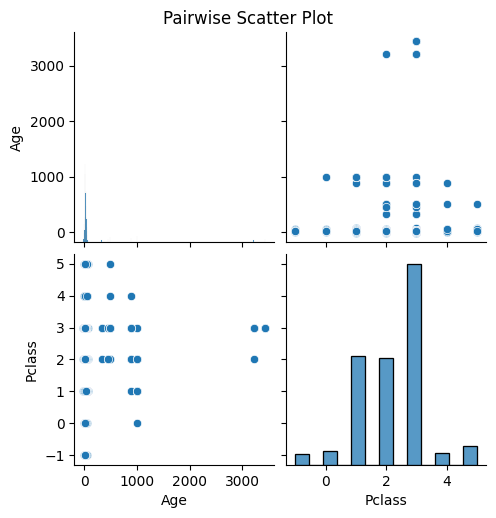

In [1330]:
sns.pairplot(dataset[["Age", "Fare", "Pclass"]].dropna())
plt.suptitle("Pairwise Scatter Plot", y=1.02)
plt.show()

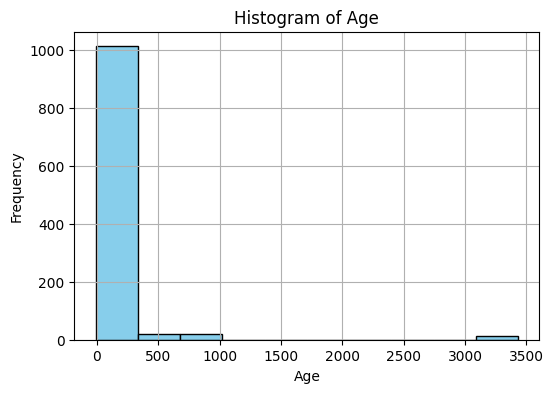

In [1331]:
plt.figure(figsize=(6, 4))
plt.hist(dataset["Age"].dropna(), bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.grid(True)
plt.show()

سن های غیر معتبر را حذف می کنیم


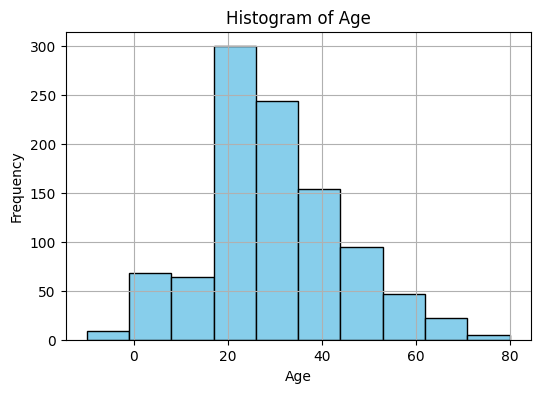

In [1332]:
plt.figure(figsize=(6, 4))
plt.hist(dataset["Age"].dropna()[dataset["Age"] <120 ], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.grid(True)
plt.show()

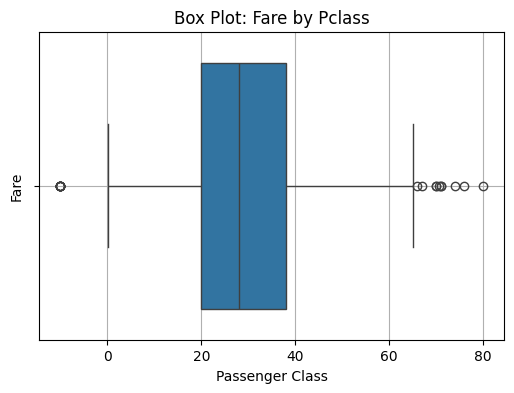

In [1333]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=dataset["Age"][dataset["Age"] < 120])
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Box Plot: Fare by Pclass")
plt.grid(True)
plt.show()


# پیش پرازش داده ها


جایگزینی مقادیر گم شده و حذف داده های نویزی و پرت و اصلاح داده های نادرست و ناسازگار


In [1334]:
newDataset = dataset.copy()
newDataset = newDataset.drop_duplicates(subset=["PassengerId"], keep='last')

ابتدا تمامی رکورد هایی که بیش تر از 3 ستون آن ها مقداری ندارد را حذف می کنیم


In [1335]:


# print(f"Total records before => {newDataset["PassengerId"].count()}") 
# newDataset = newDataset[newDataset.isnull().sum(axis=1) < 4]
# print(f"Total records after => {newDataset["PassengerId"].count()}") 


پاکسازی ستون Age


Number of Nan => 292


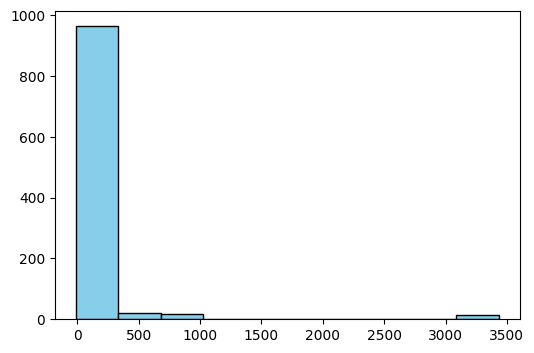

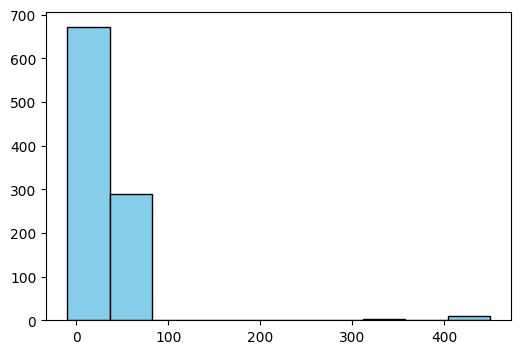

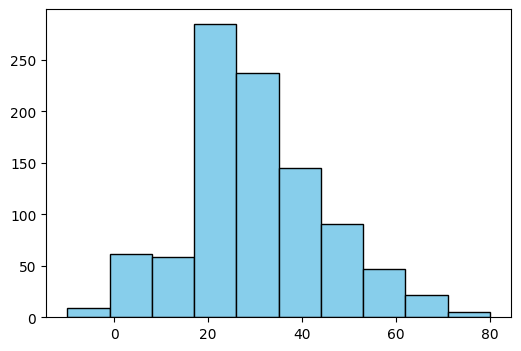

Number of Nan => 357
30.434150943396226
29.26817120622568
28.25
28.0


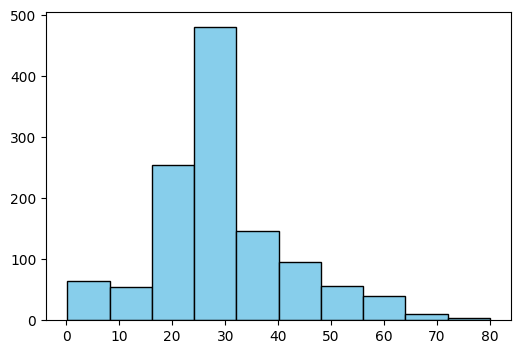

1309


In [1336]:
newDataset["Age"] = pd.to_numeric(newDataset["Age"],errors="coerce")
print(f"Number of Nan => {newDataset['Age'].isna().sum()}")

plt.figure(figsize=(6, 4))
plt.hist(newDataset["Age"],bins=10,color="skyblue",edgecolor="black")
plt.show()


plt.figure(figsize=(6, 4))
temp = newDataset["Age"][newDataset["Age"] < 500]
plt.hist(temp,bins=10,color="skyblue",edgecolor="black")
plt.show()

temp = newDataset["Age"][newDataset["Age"] < 200]

plt.figure(figsize=(6, 4))
plt.hist(temp,bins=10,color="skyblue",edgecolor="black")
plt.show()

newDataset.loc[(newDataset["Age"] < 0) | (newDataset["Age"] > 100),"Age"] = np.nan
print(f"Number of Nan => {newDataset['Age'].isna().sum()}")

mean_age_by_sex = newDataset.groupby("Sex")["Age"].mean()
print(mean_age_by_sex["male"])
print(mean_age_by_sex["female"])

median_age_by_sex = newDataset.groupby("Sex")["Age"].median()
print(median_age_by_sex["male"])
print(median_age_by_sex["female"])

newDataset.loc[(newDataset["Sex"] == "male") & (newDataset["Age"].isna()), "Age"] = mean_age_by_sex["male"]
newDataset.loc[(newDataset["Sex"] == "female") & (newDataset["Age"].isna()), "Age"] = median_age_by_sex["female"]

plt.figure(figsize=(6, 4))
plt.hist(newDataset["Age"],bins=10,color="skyblue",edgecolor="black")
plt.show()

print(newDataset["PassengerId"].count())


In [1337]:
# print(f"Before => {newDataset["PassengerId"].count()}")
# newDataset["Survived"].dropna(inplace=True)
# print(f"After => {newDataset["PassengerId"].count()}")



In [1338]:
print(newDataset["Survived"][~newDataset["Survived"].isin([1.0,0.0])].unique())

newDataset['Survived'] = newDataset['Survived'].replace(['Yes', 'yes', 'YES','1.0'], 1.0)
newDataset['Survived'] = newDataset['Survived'].replace(['No', 'no', 'NO','0.0'], 0.0)
# newDataset = newDataset[newDataset['Survived'] != 'maybe']
# newDataset = newDataset[newDataset['Survived'] != 'unknown']
# newDataset = newDataset.dropna(subset=['Survived'])
print(newDataset["Survived"][~newDataset["Survived"].isin([1.0,0.0])].unique())
print(newDataset["PassengerId"].count())



[nan '1.0' 'Yes' '0.0' 'No' 'maybe' 'unknown']
[nan 'maybe' 'unknown']
1309


پاکسازی Pclass


In [1339]:
print(newDataset["Pclass"][~newDataset["Pclass"].isin([1.0,2.0,3.0])].unique())
print(newDataset["Pclass"][newDataset["Pclass"] == 0.0].count())
mode = newDataset["Pclass"].mode()[0]
print("****")
print(mode)

newDataset['Pclass'] = newDataset['Pclass'].replace([0.0,-1.0,4.0,5.0,np.nan], mode)
print(newDataset["Pclass"][~newDataset["Pclass"].isin([1.0,2.0,3.0])].unique())
print(newDataset["PassengerId"].count())



[nan  5.  4.  0. -1.]
32
****
3.0
[]
1309


پاکسازی Sex


In [1340]:
print(newDataset["Sex"][~newDataset["Sex"].isin(['male','female'])].unique())

newDataset["Sex"] = newDataset["Sex"].replace('mele','male')

mode = newDataset["Sex"].mode()[0]

newDataset["Sex"]=newDataset["Sex"].replace([np.nan,'alien','unknown'],mode)

print(newDataset["Sex"][~newDataset["Sex"].isin(['male','female'])].unique())


[nan 'unknown' 'alien' 'mele']
[]


پاکسازی Name


In [1341]:
print(newDataset["Name"].isna())


0       False
1       False
2       False
3       False
4       False
        ...  
1369    False
1370    False
1371    False
1372    False
1373    False
Name: Name, Length: 1309, dtype: bool


پاکسازی SibSp


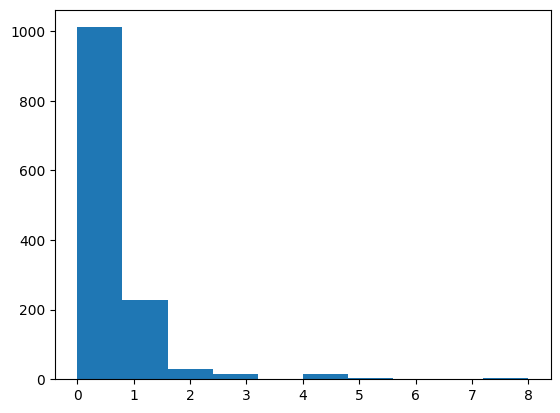

In [1342]:
newDataset["SibSp"] = pd.to_numeric(newDataset["SibSp"],errors="coerce")
newDataset.loc[(newDataset["SibSp"] < 0) | (newDataset["SibSp"] > 20),"SibSp"] = np.nan


mode = newDataset["SibSp"].mode()[0]

newDataset["SibSp"] = newDataset["SibSp"].replace(np.nan , mode)

plt.hist(newDataset["SibSp"],bins=10)
plt.show()

پاکسازی Parch


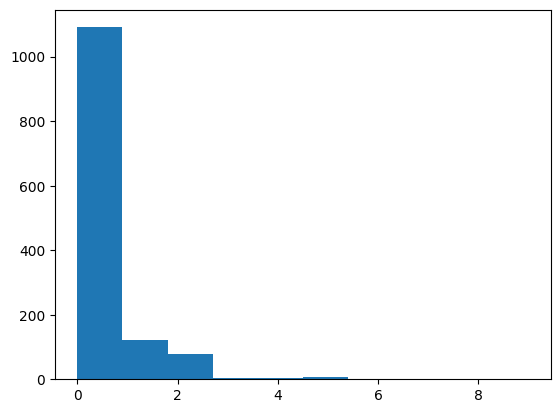

In [1343]:
newDataset["Parch"] = pd.to_numeric(newDataset["Parch"],errors="coerce")
newDataset.loc[(newDataset["Parch"] < 0) | (newDataset["Parch"] > 20),"Parch"] = np.nan


mode = newDataset["Parch"].mode()[0]

newDataset["Parch"] = newDataset["Parch"].replace(np.nan , mode)

plt.hist(newDataset["Parch"],bins=10)
plt.show()

پاکسازی Fare


In [1344]:
newDataset["Fare"] = pd.to_numeric(newDataset["Fare"],errors="coerce")

class1 = newDataset[newDataset["Pclass"] == 1]
Q1_1 = class1["Fare"].quantile(0.25)
Q3_1 = class1["Fare"].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

lower_1 = Q1_1 - 1.5 * IQR_1
upper_1 = Q3_1 + 1.5 * IQR_1
median_1 = class1["Fare"].median()

newDataset.loc[(newDataset["Pclass"] == 1) & ((newDataset["Fare"] < lower_1) | (newDataset["Fare"] > upper_1)), "Fare"] = median_1



class2 = newDataset[newDataset["Pclass"] == 2]
Q1_2 = class2["Fare"].quantile(0.25)
Q3_2 = class2["Fare"].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

lower_2 = Q1_2 - 1.5 * IQR_2
upper_2 = Q3_2 + 1.5 * IQR_2
median_2 = class2["Fare"].median()

newDataset.loc[(newDataset["Pclass"] == 2) & ((newDataset["Fare"] < lower_2) | (newDataset["Fare"] > upper_2)), "Fare"] = median_2




class3 = newDataset[newDataset["Pclass"] == 3]
Q1_3 = class3["Fare"].quantile(0.25)
Q3_3 = class3["Fare"].quantile(0.75)
IQR_3 = Q3_3 - Q1_3

lower_3 = Q1_3 - 1.5 * IQR_3
upper_3 = Q3_3 + 1.5 * IQR_3
median_3 = class3["Fare"].median()

newDataset.loc[(newDataset["Pclass"] == 3) & ((newDataset["Fare"] < lower_3) | (newDataset["Fare"] > upper_3)), "Fare"] = median_3



نرمال سازی داده ها


In [ ]:
df_zscore = newDataset.copy()

cols_to_zscore = ["Fare", "Age"]

for col in cols_to_zscore:
    mean = df_zscore[col].mean()
    std = df_zscore[col].std()

    z_col = f"{col}_zscore"
    df_zscore[z_col] = (df_zscore[col] - mean) / std

    outlier_mask = (df_zscore[z_col] > 3) | (df_zscore[z_col] < -3)

    median = df_zscore[col].median()
    df_zscore.loc[outlier_mask, col] = median
    
    df_zscore[col] = df_zscore[z_col]
    df_zscore.drop(columns=z_col)


newDataset = df_zscore.copy()

In [1346]:
newDataset.to_csv('ss.csv',index=False)

مقایسه توزیع داده ها
